In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# DATA PREPROCESSING

In [ ]:
df_train=pd.read_csv("maternal_health_risk_train.csv")
df_test=pd.read_csv("maternal_health_risk_test.csv")
df_train

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,13,90,65,7.9,101.0,80,mid risk
1,15,80,60,6.7,98.0,80,low risk
2,15,76,49,6.8,98.0,77,low risk
3,25,120,80,7.0,98.0,66,low risk
4,23,130,70,6.8,98.0,78,mid risk
...,...,...,...,...,...,...,...
806,30,120,75,6.8,98.0,70,mid risk
807,19,120,80,7.0,98.0,70,low risk
808,17,85,69,7.8,102.0,86,high risk
809,19,120,80,7.0,98.0,70,mid risk


In [ ]:
df_train.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,30.193588,114.231813,77.300863,8.802145,98.617756,74.177559
std,13.405297,18.029277,13.837264,3.325894,1.334733,7.917509
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,28.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,40.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,66.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          811 non-null    int64  
 1   SystolicBP   811 non-null    int64  
 2   DiastolicBP  811 non-null    int64  
 3   BS           811 non-null    float64
 4   BodyTemp     811 non-null    float64
 5   HeartRate    811 non-null    int64  
 6   RiskLevel    811 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 44.5+ KB


In [ ]:
df_test.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,28.586207,109.068966,73.103448,8.421724,98.854187,74.798030
std,13.705033,19.331019,13.601621,3.150512,1.497595,8.742385
min,12.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,17.000000,90.000000,60.000000,6.900000,98.000000,70.000000
50%,23.000000,120.000000,70.000000,7.200000,98.000000,76.000000
75%,35.000000,120.000000,80.000000,7.900000,100.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          203 non-null    int64  
 1   SystolicBP   203 non-null    int64  
 2   DiastolicBP  203 non-null    int64  
 3   BS           203 non-null    float64
 4   BodyTemp     203 non-null    float64
 5   HeartRate    203 non-null    int64  
 6   RiskLevel    203 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 11.2+ KB


In [ ]:
df_train.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [ ]:
df_test.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [ ]:
df_train['RiskLevel'].unique()

array(['mid risk', 'low risk', 'high risk'], dtype=object)

In [ ]:
X_train=df_train.iloc[:,:-1]
X_test=df_test.iloc[:,:-1]
y_train=df_train.iloc[:,-1]
y_test=df_test.iloc[:,-1]
y_train

,RiskLevel
0,mid risk
1,low risk
2,low risk
3,low risk
4,mid risk
...,...
806,mid risk
807,low risk
808,high risk
809,mid risk


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.transform(y_test)
y_train

array([2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 0,
       0, 1, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 1, 0, 1, 0,
       0, 2, 2, 2, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 2, 0,
       2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2,
       0, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 0, 0, 0, 1, 2, 2, 1, 1, 0, 2, 1, 0, 2, 1, 2, 0, 1, 2,
       2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 2, 1,
       2, 2, 0, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 1, 0, 2, 1, 2, 2,
       2, 0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 0, 2, 2, 1, 2, 1, 2,
       1, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1,

# EXPLORATORY DATA ANALYSIS

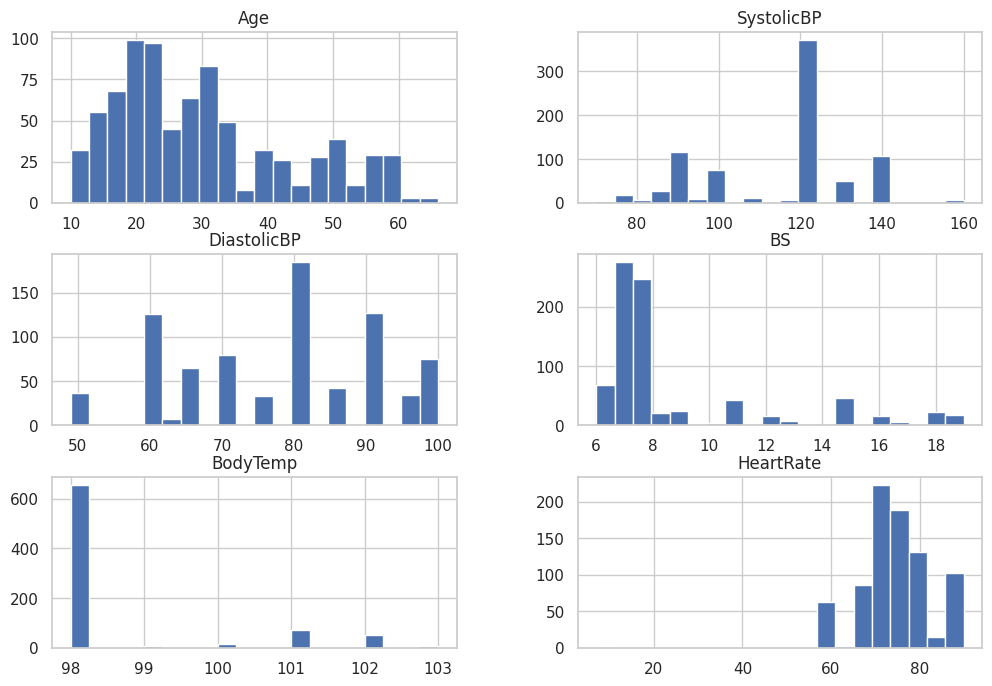

In [ ]:
sns.set(style='whitegrid')

df_train[df_train.columns].hist(bins=20,figsize=(12,8))
plt.show()

RiskLevel
low risk     323
mid risk     265
high risk    223
Name: count, dtype: int64


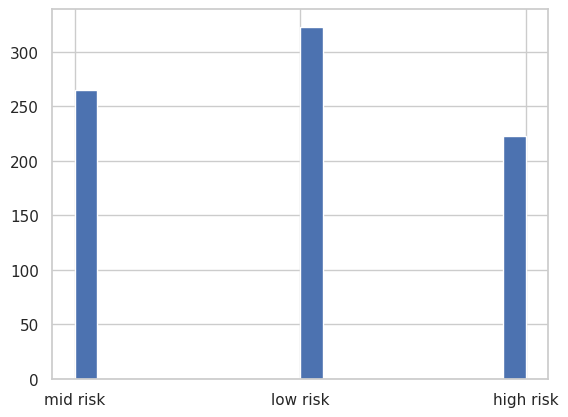

In [ ]:
print(df_train['RiskLevel'].value_counts())

df_train['RiskLevel'].hist(bins=20)
plt.show()

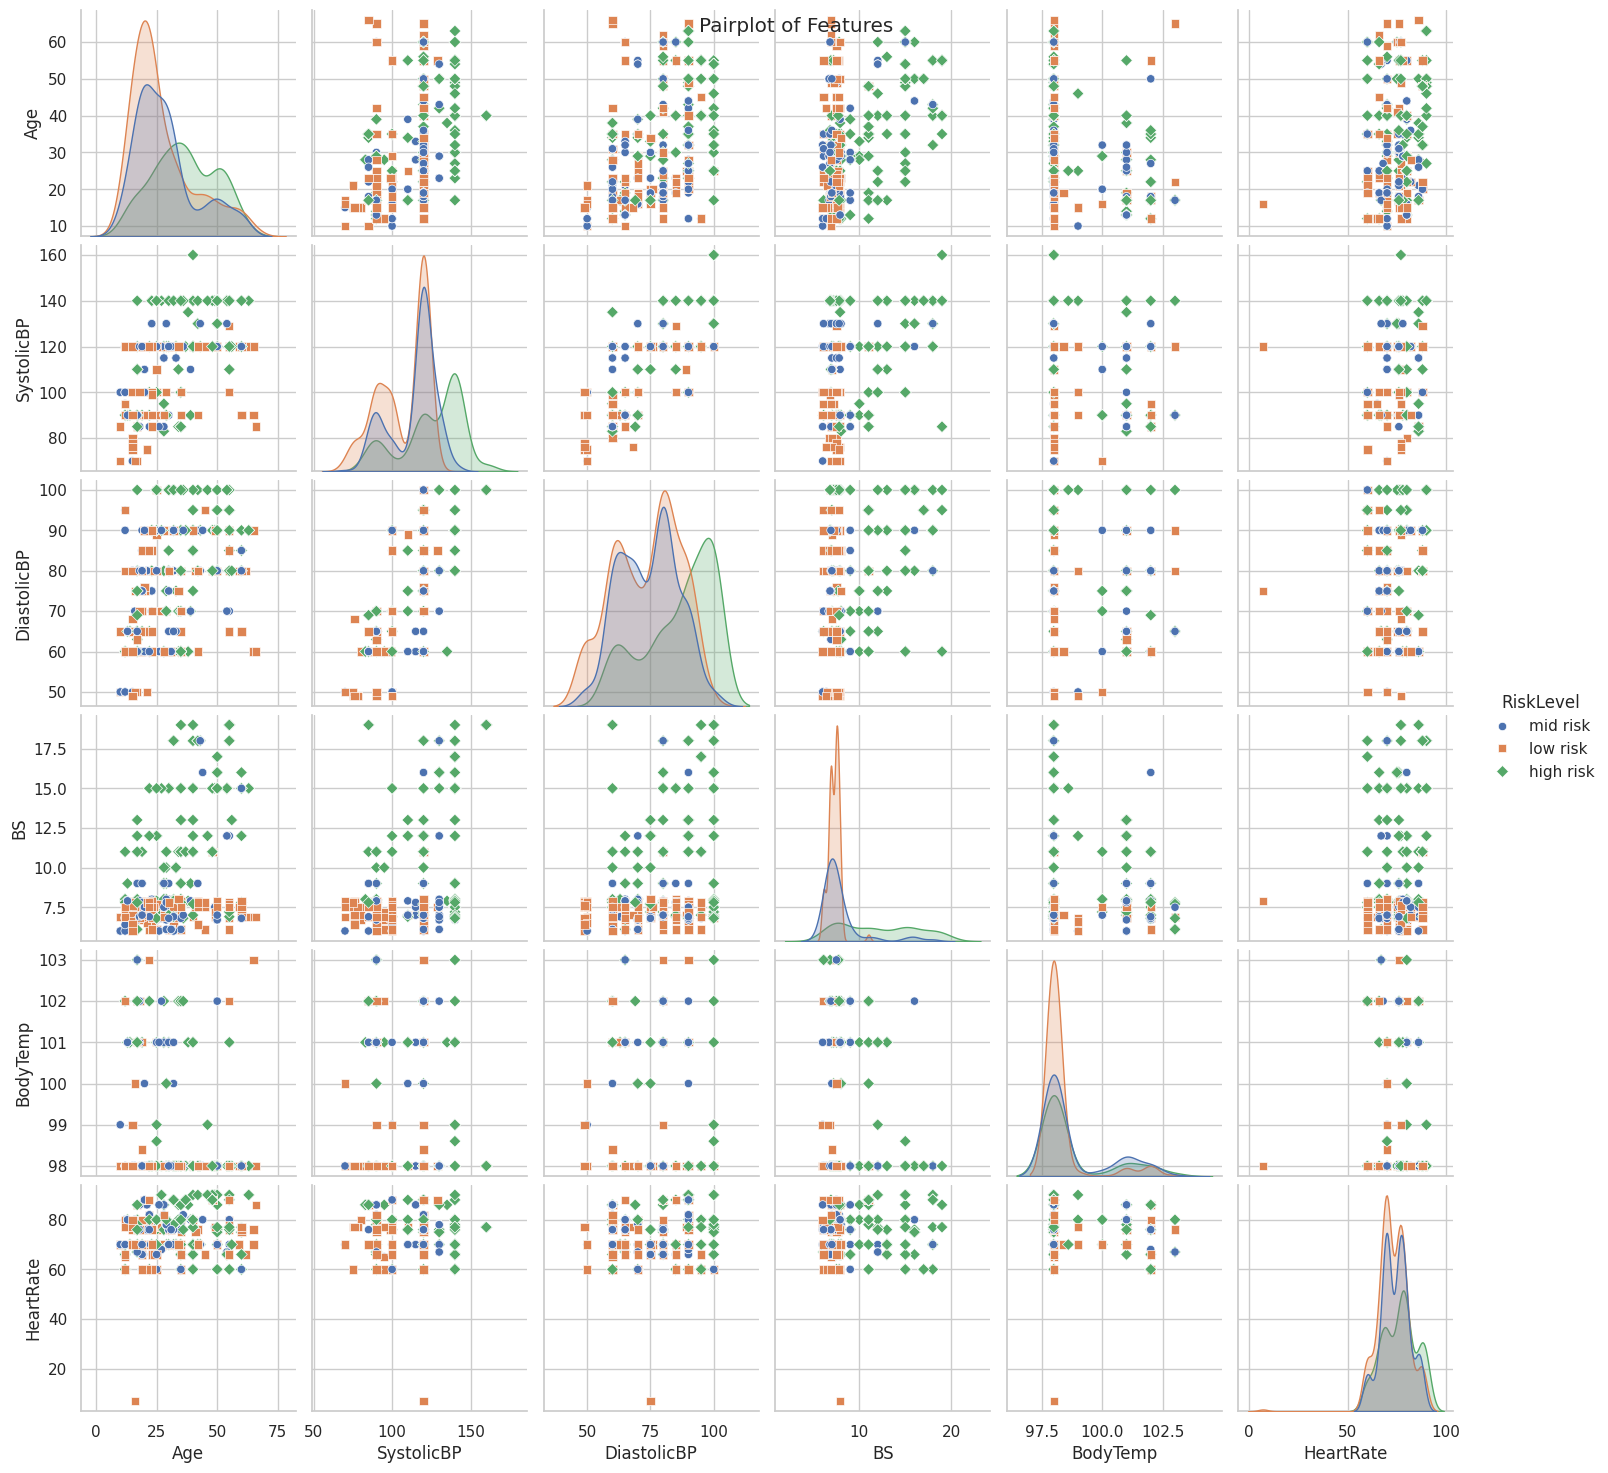

In [ ]:
sns.pairplot(df_train, hue='RiskLevel',markers=["o", "s", "D"])
plt.suptitle('Pairplot of Features')
plt.show()

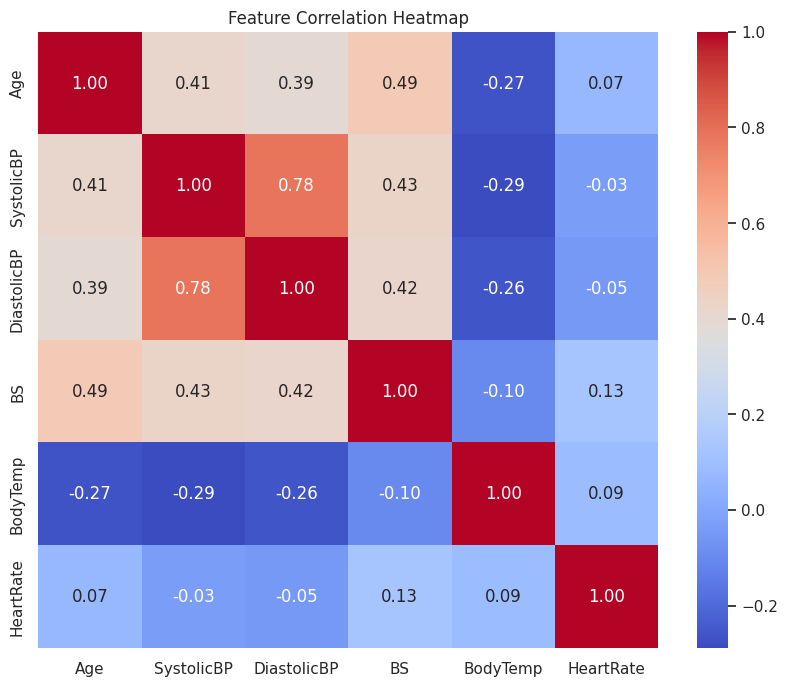

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train[X_train.columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

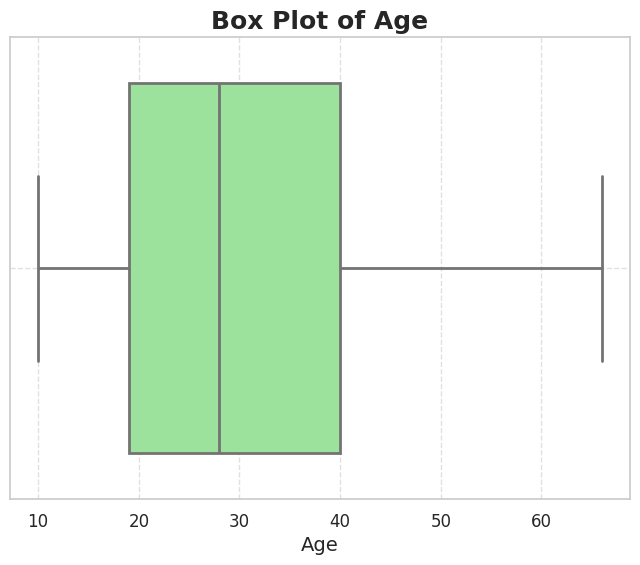

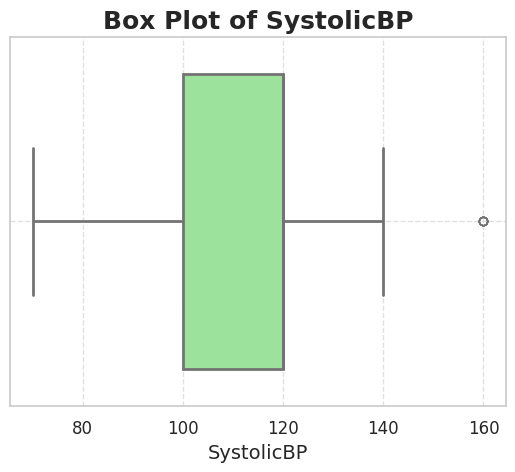

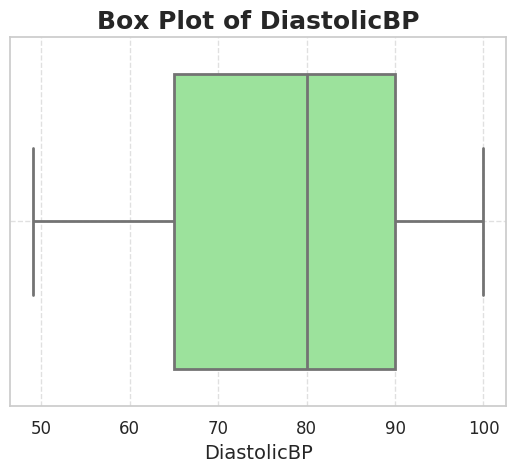

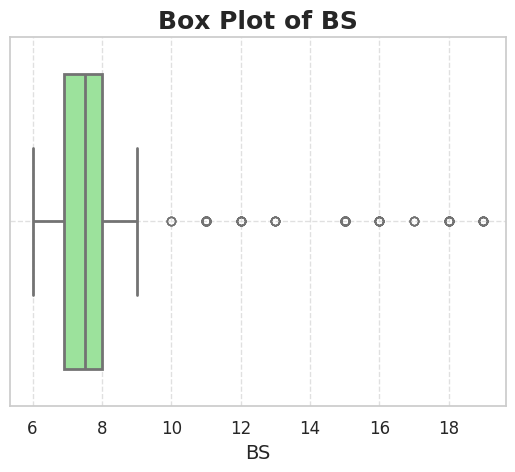

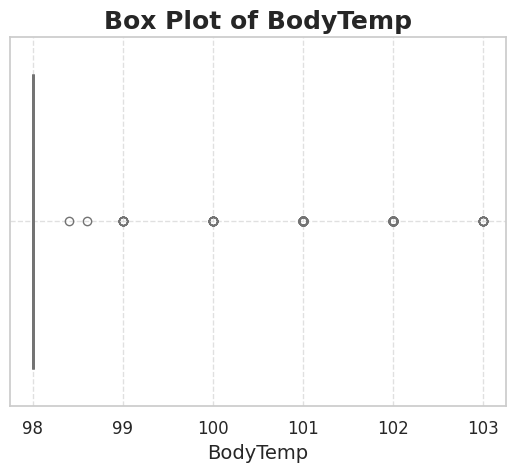

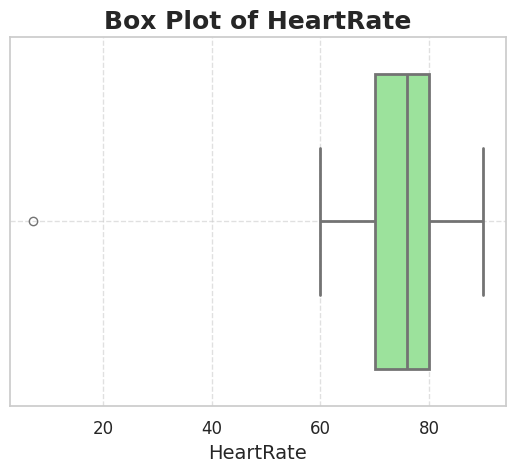

In [ ]:
plt.figure(figsize=(8, 6))
for col in X_train.columns:
    sns.boxplot(x=df_train[col], color='lightgreen', linewidth=2)
    plt.title(f'Box Plot of {col}', fontsize=18, fontweight='bold')
    plt.xlabel(f'{col}', fontsize=14)
    plt.xticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_est=[10,100,500,1000,5000]
acc_score_train=[]
acc_score_test=[]
for est in n_est:
  rfc=RandomForestClassifier(n_estimators=est,criterion='gini',random_state=0)
  rfc.fit(X_train,y_train)
  y_pred_train=rfc.predict(X_train)
  y_pred_test=rfc.predict(X_test)
  acc_score_train.append(accuracy_score(y_train,y_pred_train)*100)
  acc_score_test.append(accuracy_score(y_test,y_pred_test)*100)

print(f"Accuracy score on the training data when the no. of estimators are {n_est} is {acc_score_train}")


Accuracy score on the training data when the no. of estimators are [10, 100, 500, 1000, 5000] is [92.72503082614057, 92.97163995067818, 92.97163995067818, 92.97163995067818, 92.97163995067818]


In [ ]:
print(f"Accuracy score on the testing data when the no. of estimators are {n_est} is {acc_score_test}")

Accuracy score on the testing data when the no. of estimators are [10, 100, 500, 1000, 5000] is [84.23645320197043, 84.23645320197043, 85.22167487684729, 85.71428571428571, 85.22167487684729]


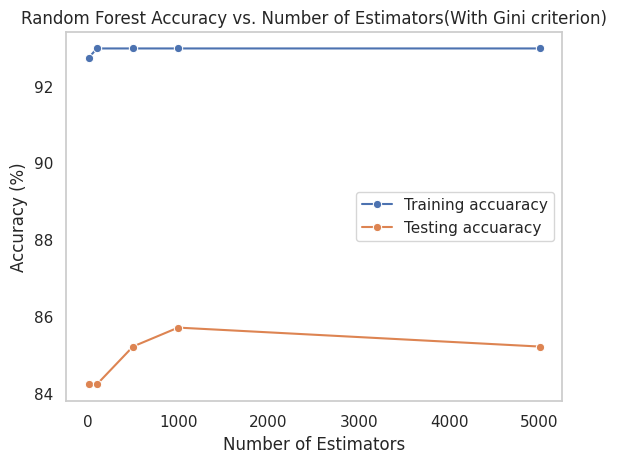

In [ ]:
sns.lineplot(x=n_est,y=acc_score_train,marker="o",label="Training accuaracy")
sns.lineplot(x=n_est,y=acc_score_test,marker="o",label="Testing accuaracy")
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy (%)')
plt.title('Random Forest Accuracy vs. Number of Estimators(With Gini criterion)')
plt.legend()
plt.grid()

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_est=[10,100,500,1000,5000]
acc_score_train=[]
acc_score_test=[]
for est in n_est:
  rfc=RandomForestClassifier(n_estimators=est,criterion='entropy',random_state=0)
  rfc.fit(X_train,y_train)
  y_pred_train=rfc.predict(X_train)
  y_pred_test=rfc.predict(X_test)
  acc_score_train.append(accuracy_score(y_train,y_pred_train)*100)
  acc_score_test.append(accuracy_score(y_test,y_pred_test)*100)

print(f"Accuracy score on the training data when the no. of estimators are {n_est} is {acc_score_train}")
print(f"Accuracy score on the testing data when the no. of estimators are {n_est} is {acc_score_test}")


Accuracy score on the training data when the no. of estimators are [10, 100, 500, 1000, 5000] is [92.60172626387177, 92.97163995067818, 92.97163995067818, 92.97163995067818, 92.97163995067818]
Accuracy score on the testing data when the no. of estimators are [10, 100, 500, 1000, 5000] is [82.26600985221675, 83.74384236453201, 84.23645320197043, 85.71428571428571, 85.22167487684729]


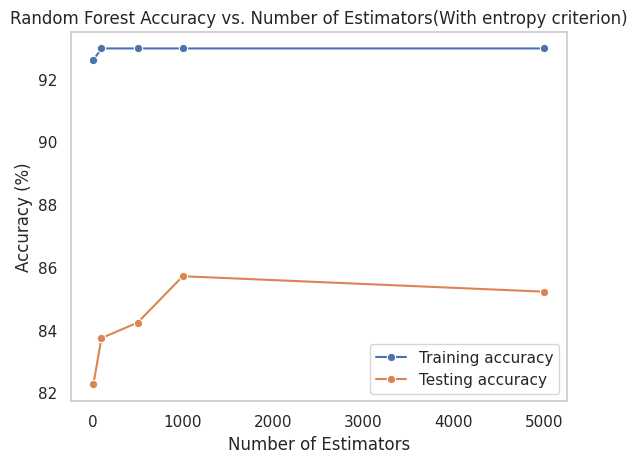

In [ ]:
sns.lineplot(x=n_est,y=acc_score_train,marker="o",label="Training accuracy")
sns.lineplot(x=n_est,y=acc_score_test,marker="o",label="Testing accuracy")
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy (%)')
plt.title('Random Forest Accuracy vs. Number of Estimators(With entropy criterion)')
plt.legend()
plt.grid()

plt.show()

In [ ]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print(f"The accuracy score using the default parameters is {acc*100}")

The accuracy score using the default parameters is 84.23645320197043


In [ ]:
from sklearn.model_selection import GridSearchCV
parameter_grid={
    'n_estimators':[10,100,500,1000],
    'max_depth':[10,20,30]
}
rf=RandomForestClassifier(random_state=43)
gsc=GridSearchCV(estimator=rf,param_grid=parameter_grid,cv=10)
gsc.fit(X_train,y_train)

results=pd.DataFrame(gsc.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021801,0.001535,0.003118,0.000270,10,10,"{'max_depth': 10, 'n_estimators': 10}",0.731707,0.802469,0.716049,0.851852,0.765432,0.839506,0.753086,0.753086,0.777778,0.814815,0.780578,0.043017,12
1,0.181513,0.007911,0.007388,0.000168,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.756098,0.790123,0.814815,0.851852,0.765432,0.827160,0.802469,0.753086,0.814815,0.888889,0.806474,0.040956,9
2,1.055246,0.404893,0.028710,0.005469,10,500,"{'max_depth': 10, 'n_estimators': 500}",0.743902,0.814815,0.802469,0.839506,0.765432,0.827160,0.777778,0.777778,0.790123,0.888889,0.802785,0.039717,10
3,1.991756,0.418327,0.062195,0.014305,10,1000,"{'max_depth': 10, 'n_estimators': 1000}",0.743902,0.827160,0.802469,0.827160,0.753086,0.814815,0.777778,0.790123,0.790123,0.888889,0.801551,0.039516,11
4,0.021840,0.001011,0.002964,0.000077,20,10,"{'max_depth': 20, 'n_estimators': 10}",0.853659,0.864198,0.827160,0.888889,0.790123,0.827160,0.814815,0.740741,0.802469,0.876543,0.828576,0.042314,6
5,0.185500,0.004347,0.007498,0.000112,20,100,"{'max_depth': 20, 'n_estimators': 100}",0.878049,0.851852,0.827160,0.901235,0.814815,0.851852,0.790123,0.765432,0.802469,0.913580,0.839657,0.045986,1
6,1.041877,0.236907,0.032270,0.007259,20,500,"{'max_depth': 20, 'n_estimators': 500}",0.853659,0.864198,0.839506,0.901235,0.790123,0.790123,0.790123,0.765432,0.814815,0.913580,0.832279,0.047956,3
7,2.239658,0.685292,0.073415,0.021171,20,1000,"{'max_depth': 20, 'n_estimators': 1000}",0.865854,0.876543,0.827160,0.888889,0.790123,0.802469,0.790123,0.765432,0.790123,0.913580,0.831030,0.048580,5
8,0.022650,0.001211,0.003179,0.000525,30,10,"{'max_depth': 30, 'n_estimators': 10}",0.853659,0.851852,0.839506,0.888889,0.777778,0.827160,0.814815,0.740741,0.802469,0.864198,0.826107,0.041599,8
9,0.285737,0.036260,0.012457,0.002297,30,100,"{'max_depth': 30, 'n_estimators': 100}",0.865854,0.851852,0.827160,0.901235,0.814815,0.802469,0.790123,0.765432,0.802469,0.913580,0.833499,0.046059,2


In [ ]:
print(f"The best parameters are {gsc.best_params_}")

The best parameters are {'max_depth': 20, 'n_estimators': 100}


In [ ]:
print(gsc.best_score_)

0.8396567299006323


In [ ]:
model=RandomForestClassifier(criterion='gini',n_estimators=100,max_depth=20)
model.fit(X_train,y_train)
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)
print(f"Accuracy on test data {accuracy_score(y_test,y_pred_test)*100}")
print(f"Accuracy on training data {accuracy_score(y_train,y_pred_train)*100}")

Accuracy on test data 83.74384236453201
Accuracy on training data 92.97163995067818


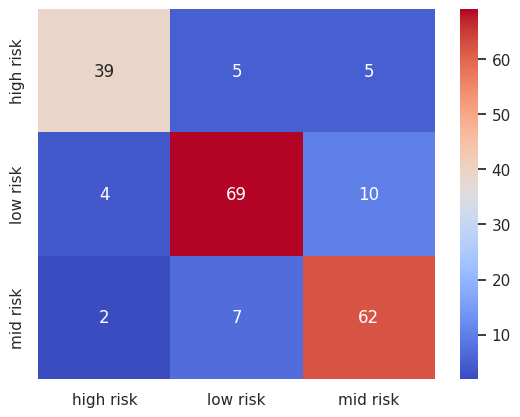

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=['high risk','low risk','mid risk'], yticklabels=['high risk','low risk','mid risk'], cmap="coolwarm")
plt.show()

# KNN Classifier


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_scaled=sc.transform(X_train)
X_test_scaled=sc.transform(X_test)

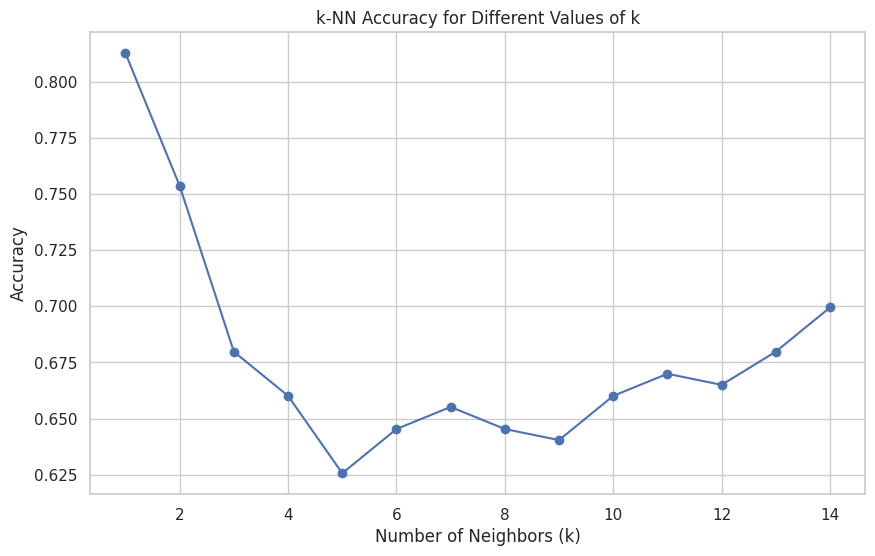

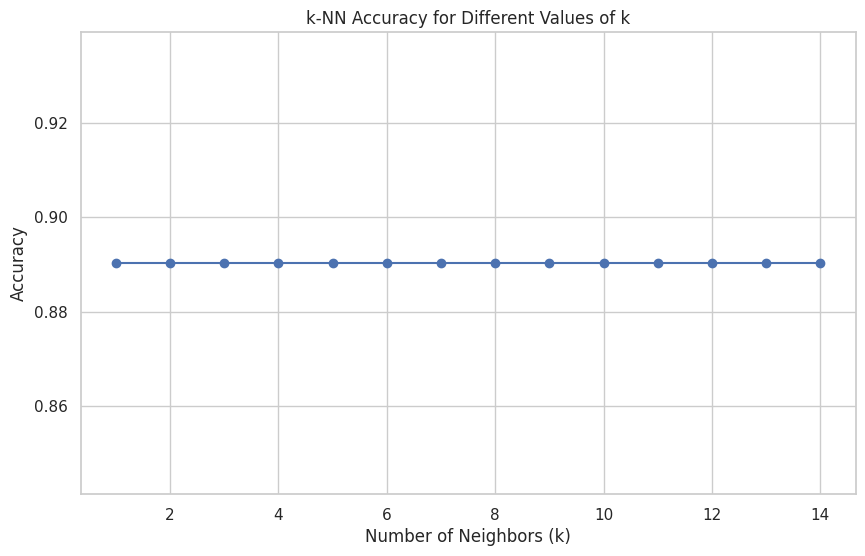

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

k_values = range(1, 15)
accuracies_test = []
accuracies_train = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_test = knn.predict(X_test_scaled)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    accuracies_test.append(accuracy_test)
    accuracies_train.append(accuracy_train)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies_test, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy for Different Values of k')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies_train, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy for Different Values of k')
plt.grid(True)
plt.show()


In [ ]:
for k in range(1, 11):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train_scaled, y_train, cv=kf)
    print(f'Cross-Validation Scores when k is {k}: {cv_scores}')
    print(f'Mean Cross-Validation Score: {cv_scores.mean():.2f}')

Cross-Validation Scores when k is 1: [0.79754601 0.82716049 0.80246914 0.72839506 0.85185185]
Mean Cross-Validation Score: 0.80
Cross-Validation Scores when k is 2: [0.69325153 0.72839506 0.7345679  0.67901235 0.77777778]
Mean Cross-Validation Score: 0.72
Cross-Validation Scores when k is 3: [0.66871166 0.69753086 0.67283951 0.57407407 0.67901235]
Mean Cross-Validation Score: 0.66
Cross-Validation Scores when k is 4: [0.65644172 0.7037037  0.70987654 0.62345679 0.67283951]
Mean Cross-Validation Score: 0.67
Cross-Validation Scores when k is 5: [0.63803681 0.7037037  0.69753086 0.63580247 0.66666667]
Mean Cross-Validation Score: 0.67
Cross-Validation Scores when k is 6: [0.66257669 0.71604938 0.74074074 0.67283951 0.69135802]
Mean Cross-Validation Score: 0.70
Cross-Validation Scores when k is 7: [0.62576687 0.69753086 0.75308642 0.7037037  0.67283951]
Mean Cross-Validation Score: 0.69
Cross-Validation Scores when k is 8: [0.65644172 0.7345679  0.75308642 0.69753086 0.67283951]
Mean Cross

# SVM Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'poly'],
    'gamma': [0.001, 0.01, 0.1],
    'degree': [2, 3]
}

svm = SVC(random_state=42)

cv = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_svm = grid_search.best_estimator_
best_svm.fit(X_train_scaled, y_train)

y_pred_train = best_svm.predict(X_train_scaled)
y_pred_test = best_svm.predict(X_test_scaled)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
print("Test Accuracy:", accuracy_score(y_test,y_pred_test))


Best Parameters: {'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.7164053624176323
Train Accuracy: 0.752157829839704
Test Accuracy: 0.6748768472906403


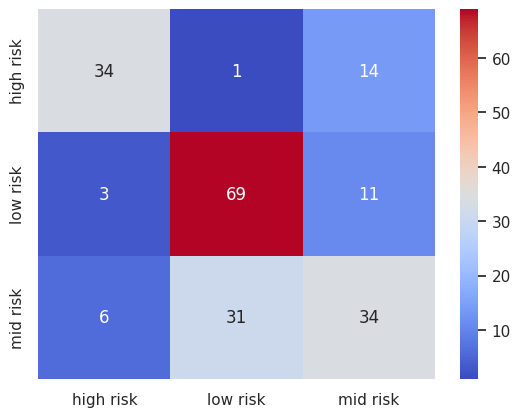

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=['high risk','low risk','mid risk'], yticklabels=['high risk','low risk','mid risk'], cmap="coolwarm")
plt.show()